In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [87]:
def one_band_normal_hall_equation(B, rho_0, R_H):
    return rho_0 + R_H * B

In [88]:
def load_data(file_path):
    cleaned_data = []

    # Open and preprocess the file to skip invalid rows
    with open(file_path, 'r') as f:
        for line in f:
            # Split the line into columns
            columns = line.strip().split('\t')
            try:
                # Convert both columns to floats
                magnetic_field = float(columns[0])
                resistivity = float(columns[1])
                cleaned_data.append((magnetic_field, resistivity))
            except (ValueError, IndexError):
                # Skip lines that cannot be converted to floats or are incomplete
                continue

    # Convert the cleaned data to a NumPy array
    cleaned_data = np.array(cleaned_data)
    if cleaned_data.size == 0:
        raise ValueError("No valid data found in the file.")
    return cleaned_data[:, 0], cleaned_data[:, 1]

In [89]:
def fit_hall_data(magnetic_field, resistivity):
    # Initial guess for [rho_0, R_H]
    initial_guess = [resistivity[0], 0.01]
    params, covariance = curve_fit(one_band_normal_hall_equation, magnetic_field, resistivity, p0=initial_guess)
    return params, np.sqrt(np.diag(covariance))

In [90]:
def plot_results(magnetic_field, resistivity, params):
    B_fit = np.linspace(min(magnetic_field), max(magnetic_field), 500)
    rho_fit = one_band_normal_hall_equation(B_fit, *params)

    plt.figure(figsize=(8, 6))
    plt.scatter(magnetic_field, resistivity, label="Data", color='blue')
    plt.plot(B_fit, rho_fit, label=f"Fit: $\\rho_0={params[0]:.4f}, R_H={params[1]:.4f}$", color='red')
    plt.xlabel("Magnetic Field (T)")
    plt.ylabel("Resistivity (μΩ·cm)")
    plt.legend()
    plt.title("Hall Effect Fitting")
    plt.grid(True)
    plt.show()


In [91]:
file_path = "Hall/200K.txt" 

Fitted Parameters:
ρ₀ (micro Ohm cm) = -0.0043 ± 0.0001
R_H (microOhm cm/T) = -0.0709 ± 0.0000
n = 8.82e+27 m^-3


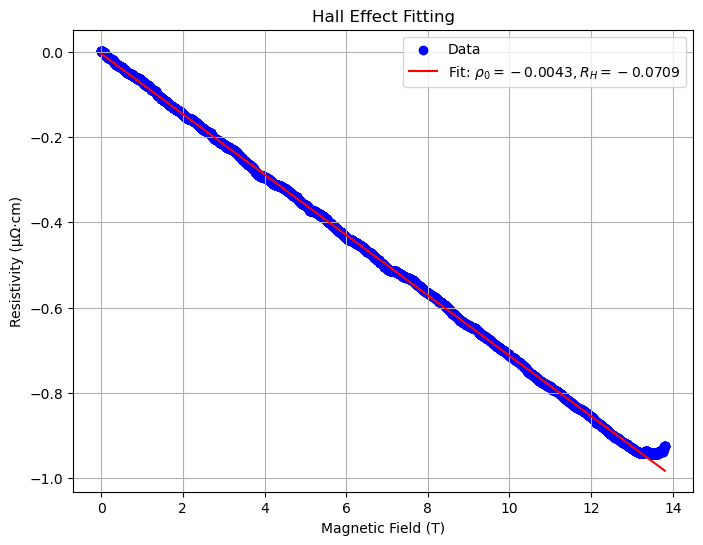

In [92]:
  # Load the data
magnetic_field, resistivity = load_data(file_path)

    # Fit the data
params, errors = fit_hall_data(magnetic_field, resistivity)
print(f"Fitted Parameters:\nρ₀ (micro Ohm cm) = {params[0]:.4f} ± {errors[0]:.4f}\nR_H (microOhm cm/T) = {params[1]:.4f} ± {errors[1]:.4f}")

    # Plot the results

r_h = params[1] #microOhm cm/T = E-8Ohm m/T
e = -1.6E-19 #C
n = 1/(r_h * e * 10**(-8))
print(f'n = {n:.2e} m^-3')
plot_results(magnetic_field, resistivity, params)

In [93]:
n_cm = n/10**6
print(f'n = {n_cm:.2e} cm^-3')
rh_cm = 1/(n_cm * e)
print(f'r_h = {rh_cm:.3e} cm^-3/C')

n = 8.82e+21 cm^-3
r_h = -7.087e-04 cm^-3/C


In [94]:
def save_rho_vs_field(file_path, magnetic_field, params):
    # Calculate rho for each magnetic field value
    rho_values = one_band_normal_hall_equation(magnetic_field, *params)
    
    # Save to file
    with open(file_path, 'w') as f:
        f.write("Fitted Parameters from Hall Effect Data\n")
        f.write("---------------------------------------\n")
        f.write(f'n = {n_cm:.2e} cm^-3\n')
        f.write(f'r_h = {rh_cm:.3e} cm^-3/C\n')
        f.write("---------------------------------------\n")
        f.write("Magnetic Field (T)\tResistivity (μΩ·cm)\n")
        for B, rho in zip(magnetic_field, rho_values):
            f.write(f"{B:.4f}\t{rho:.4f}\n")
    print(f"ρ as a function of field saved to {file_path}")


In [95]:
output_file = "Hall/200K_fit.txt" 

In [96]:
 save_rho_vs_field(output_file, magnetic_field, params)

ρ as a function of field saved to Hall/200K_fit.txt
